In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import quad
from math import sqrt,pow,log
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.optimize import curve_fit
plt.style.use('/root/Github_Repos/HubbleConstant-ConstraintsForVCG/standard.mplstyle')

In [2]:
def defineparam():
  global omega_r0
  omega_r0 = float(input("Omega R0: "))
  global omega_b0
  omega_b0 = float(input("Omega B0: "))
defineparam()

Omega R0: .0000245
Omega B0: .02


In [3]:
def int_func(redshift):
      return 1/((pow((1+redshift),2)*(omega_r0+(omega_b0/(1+redshift))+((1-omega_b0-omega_r0)*((omega_m*(1+redshift)**6)+(1-omega_m)*(1+redshift)**n)**(0.5)/(1+redshift)**(4)))**(0.5)))

In [7]:
name=np.array(['GW190521','GW190706_222641','GW190413_134308','GW190514_065416','GW190719_215514','GW190521',"GW190909_114149","GW190413_052954",'GW190803_022701','GW190731_140936','GW190727_060333','GW190620_030421','GW190421_213856','GW170729','GW190602_175927','GW190527_092055','GW190519_153544','GW190424_180648','GW190929_012149','GW190828_063405','GW190701_203306','GW190513_205428','GW170823','GW190517_055101','GW190915_235702','GW190828_065509','GW190408_181802','GW190910_112807','GW190512_180714','GW190503_185404','GW190521_074359','GW170818','GW151012','GW170809','GW170104','GW190728_064510','GW190708_232457','GW190630_185205','GW190720_000836','GW190707_093326','GW190930_133541','GW190412','GW190924_021846','GW170814','GW151226','GW150914','GW190426_152155','GW200115_042309','GW170608','GW200105_162426','GW190814','GW190425'])
full_DL_GW=np.array([[5300.0,2400,-2600],[4420.0,2590,-1930],[4450,2480,-2120],[4130.0,2650,-2170],[3940.0,2590,-2000],[3920.0,2190,-1950],[3770.0,3270,-2220],[3550.0,2270,-1660],[3270.0,1950,-1580],[3300.0,2390,-1720],[3300.0,1540,-1500],[2810.0,1680,-1310],[2880.0,1370,-1380],[2840.0,1400,-1360],[2690.0,1790,-1120],[2490.0,2480,-1240],[2530.0,1830,-920],[2200.0,1580,-1160],[2130.0,3650,-1050],[2130.0,660,-930],[2060.0,760,-730],[2060.0,880,-800],[1940.0,970,-900],[1860.0,1620,-840],[1620.0,710,-610],[1600.0,620,-600],[1550.0,400,-600],[1460.0,1030,-580],[1430.0,550,-550],[1450.0,690,-630],[1240.0,400,-570],[1060.0,420,-380],[1080.0,550,-490],[1030.0,320,-390],[990.0,440,-430],[870.0,260,-370],[880.0,330,-390],[890.0,560,-370],[790.0,690,-320],[770.0,380,-370],[760.0,360,-320],[740.0,140,-170],[570.0,220,-220],[600.0,150,-220],[450.0,180,-190],[440.0,150,-170],[370.0,180,-160],[300.0,150,-100],[320.0,120,-110],[280.0,110,-110],[241.0,41,-45],[159.0,69,-72]])
full_Z_GW=np.array([[0.82,0.28,-0.34],[0.71,0.32,-0.27],[0.71,0.31,-0.30],[0.67,0.33,-0.31],[0.64,0.33,-0.29],[0.64,0.28,-0.28],[0.62,0.41,-0.33],[0.59,0.29,-0.24],[0.55,0.26,-0.24],[0.55,0.31,-0.26],[0.55,0.21,-0.22],[0.49,0.23,-0.20],[0.49,0.19,-0.21],[0.49,0.19,-0.21],[0.47,0.25,-0.17],[0.44,0.34,-0.20],[0.44,0.25,-0.14],[0.39,0.23,-0.19],[0.38,0.49,-0.17],[0.38,0.10,-0.15],[0.37,0.11,-0.12],[0.37,0.13,-0.13],[0.35,0.15,-0.15],[0.34,0.24,-0.14],[0.3,0.11,-0.10],[0.3,0.10,-0.10],[0.29,0.06,-0.10],[0.28,0.16,-0.10],[0.27,0.09,-0.10],[0.27,0.11,-0.11],[0.24,0.07,-0.10],[0.21,0.07,-0.07],[0.21,0.09,-0.09],[0.2,0.05,-0.07],[0.2,0.08,-0.08],[0.18,0.05,-0.07],[0.18,0.06,-0.07],[0.18,0.10,-0.07],[0.16,0.12,-0.06],[0.16,0.07,-0.07],[0.15,0.06,-0.06],[0.15,0.03,-0.03],[0.12,0.04,-0.04],[0.12,0.03,-0.04],[0.09,0.04,-0.04],[0.09,0.03,-0.03],[0.08,0.04,-0.03],[0.07,0.03,-0.02],[0.07,0.02,-0.02],[0.06,0.02,-0.02],[0.053,0.009,-0.010],[0.04,0.01,-0.02]])
# Number of events
a=name.size

#Defining arrays
dldata_GW=np.zeros(a)
dlUP=np.zeros(a)
dlLOW=np.zeros(a)
dlTOP=np.zeros(a)
dlBOTTOM=np.zeros(a)
dmtop=np.zeros(a)
dmbottom=np.zeros(a)
Z_GW=np.zeros(a)
Zup_GW=np.zeros(a)
Zlow_GW=np.zeros(a)
dmth_GW=np.zeros(a)
dmdata_GW=np.zeros(a)
dlth_GW = np.zeros(a)
dmtoperr=np.zeros(a)
dmbottomerr=np.zeros(a)
#defining variables for index of the above arrays
b=c=d=e=f=h=k=l=m=x=y=p=q=r=s=xx=yy=0
#extracting redshifts and DL from the full data
for i in full_Z_GW:
  Z_GW[e]+=i[0]
  e+=1
for i in full_Z_GW:
  Zup_GW[xx]+=i[1] +i[0]
  xx+=1
for i in full_Z_GW:
  Zlow_GW[yy]+=i[0]+i[2]
  yy+=1
for i in full_DL_GW:
  dldata_GW[b]+=i[0]
  b+=1
#Upper and Lower limit of DL from data
for i in full_DL_GW:
  dlUP[c]+=i[0]+i[1]
  c+=1
for i in full_DL_GW:
  dlLOW[d]+=i[0]+i[2]
  d+=1
# Calculating upper and lower limit of Distance modulus from DL limits calculated above

#Calculating differences in DL from its limits
for (i,j) in zip(dldata_GW,dlUP):
  dlTOP[x]+=j-i
  x+=1
for (i,j) in zip(dldata_GW,dlLOW):
  dlBOTTOM[y]=i-j
  y+=1


# DL-h1 < DL < DL+h2,if h1<h2, take error to be h1 or vice versa
#new_error=np.zeros(a)
#for (i,j) in zip(dlTOP,dlBOTTOM):
 # if i<j:
#    new_error[p]+=i
#    p+=1
#  elif j<i:
#    new_error[q]+=j
 #   q+=1


#for (i,j) in zip(dmtoperr,dmbottomerr):
#  if i<j:
 #  new_error[p]+=i
  # p+=1
#  elif j<i:
 #  new_error[q]+=j
  # q+=1

label1 = {"Event_Name":name,"Z_GW":Z_GW,"Zup_GW":Zup_GW,"Zlow_GW":Zlow_GW,"dLdata_GW":dldata_GW,"DL_Uplimit": dlUP, "DL_Lowlimit": dlLOW,"DL_UP_Error":dlTOP,"DL_LOW_Error":dlBOTTOM}
data_GW=pd.DataFrame(label1)
#data_GW.to_excel(excel_writer = "/root/Github_Repos/VCG_GW/GWTColdGW.xlsx")

In [8]:
data_GWTC3 = pd.read_excel (r'/root/Github_Repos/VCG_GW/oldGW.xlsx')
data_GWTC3.index= np.arange(52,87)

In [9]:
Zplus=data_GWTC3.redshift_upper + data_GWTC3.redshift
Zminus=data_GWTC3.redshift_lower + data_GWTC3.redshift
data_GWTC3["Zplus"]=Zplus
data_GWTC3["Zminus"]=Zminus

In [10]:


mucollect=[data_GW.Z_GW,data_GWTC3.redshift]
finalredshift = pd.concat(mucollect)

mucollectup=[data_GW.Zup_GW,data_GWTC3.Zplus]
finalredshiftup = pd.concat(mucollectup)

mucollectlow=[data_GW.Zlow_GW,data_GWTC3.Zminus]
finalredshiftlow = pd.concat(mucollectlow)

namecollect=[data_GW.Event_Name,data_GWTC3.Event_Name_GWTC3]
finalevents = pd.concat(namecollect)

dlcollect=[data_GW.dLdata_GW,data_GWTC3.luminosity_distance]
finaldl = pd.concat(dlcollect)

dlupcollect=[data_GW.DL_Uplimit,data_GWTC3.luminosity_distance_upper]
finaldlup = pd.concat(dlupcollect)

dllowcollect=[data_GW.DL_Lowlimit,data_GWTC3.luminosity_distance_lower]
finaldllow = pd.concat(dllowcollect)

label2 = {"Fin_Event_Name":finalevents,"Fin_Z_GW":finalredshift,"Fin_Zup_GW":finalredshiftup,"Fin_Zlow_GW":finalredshiftlow,"Fin_dLdata_GW":finaldl, "Fin_DL_UpError": finaldlup, "Fin_DL_LowError": finaldllow}
Fin_data_GW=pd.DataFrame(label2)

a=finalevents.size

#Defining arrays
H0GW=np.zeros(a)
H0uperror=np.zeros(a)
H0lowerror=np.zeros(a)

#defining variables for index of the above arrays
f=h=k=l=m=x=y=p=q=r=s=0


omega_m=.09
n=1.4545

# Calculating theoretical value of DL and DM from the model VCG
#for i in finalredshift:
 # g=quad(int_func,0,i)
 # H0GW[l]+=(1+i)*g[0]*(300000/Fin_data_GW.Fin_dLdata_GW[l] )
 # l+=1
#for i in finalredshiftup:
 # g=quad(int_func,0,i)
 # H0uperror[f]+=((Fin_data_GW.Fin_DL_UpError[f]-Fin_data_GW.Fin_dLdata_GW[f])/Fin_data_GW.Fin_DL_UpError[f])*(1+i)*g[0]*(300000/Fin_data_GW.Fin_dLdata_GW[f] )
 # f+=1
#for i in finalredshift:
 # g=quad(int_func,0,i)
  #H0lowerror[k]+=((Fin_data_GW.Fin_dLdata_GW[k]-Fin_data_GW.Fin_DL_LowError[k])/(2*Fin_data_GW.Fin_dLdata_GW[k]-Fin_data_GW.Fin_DL_LowError[k]))*(1+i)*g[0]*(300000/Fin_data_GW.Fin_dLdata_GW[k] )
  #k+=1
#Fin_data_GW["H0_GW"]=H0GW
#Fin_data_GW["H0_+error"]=H0uperror
#Fin_data_GW["H0_-error"]=H0lowerror
#label3={"H0_GW":H0GW,"H0_+error":H0uperror , "H0_-error": H0lowerror }
#Fin_data_GW=pd.DataFrame(label3)

In [11]:
namecollect=[data_GW.Event_Name,data_GWTC3.Event_Name_GWTC3]
finalevents = pd.concat(namecollect)
sort_data_GW=Fin_data_GW.sort_values(by=['Fin_Z_GW'])
sort_data_GW

,Fin_Event_Name,Fin_Z_GW,Fin_Zup_GW,Fin_Zlow_GW,Fin_dLdata_GW,Fin_DL_UpError,Fin_DL_LowError
51,GW190425,0.040,0.050,0.020,159.0,228.0,87.0
50,GW190814,0.053,0.062,0.043,241.0,282.0,196.0
67,GW200115_042309-v2,0.060,0.090,0.080,290.0,440.0,190.0
49,GW200105_162426,0.060,0.080,0.040,280.0,390.0,170.0
48,GW170608,0.070,0.090,0.050,320.0,440.0,210.0
...,...,...,...,...,...,...,...
2,GW190413_134308,0.710,1.020,0.410,4450.0,6930.0,2330.0
1,GW190706_222641,0.710,1.030,0.440,4420.0,7010.0,2490.0
0,GW190521,0.820,1.100,0.480,5300.0,7700.0,2700.0
83,GW200308_173609-v1,0.830,1.150,1.180,5400.0,8100.0,2800.0


In [12]:
a=xx=yy=0
c=finalevents.size
INTGW=np.zeros(c)
INTGWminus=np.zeros(c)
INTGWplus=np.zeros(c)
for redshift in sort_data_GW.Fin_Z_GW:
  g = quad(int_func,0,redshift)
  INTGW[a]+=(1+redshift)*g[0]*(300000) 
  a=a+1
for redshift in sort_data_GW.Fin_Zup_GW:
  g = quad(int_func,0,redshift)
  INTGWplus[xx]+=(1+redshift)*g[0]*(300000) 
  xx=xx+1
INTGWup=INTGWplus-INTGW
for redshift in sort_data_GW.Fin_Zlow_GW:
  g = quad(int_func,0,redshift)
  INTGWminus[yy]+=(1+redshift)*g[0]*(300000) 
  yy=yy+1
INTGWlow=INTGW-INTGWminus
sort_data_GW["Int"]= INTGW
sort_data_GW["IntUP"]= INTGWup
sort_data_GW["Intlow"]= INTGWlow
sort_data_GW

,Fin_Event_Name,Fin_Z_GW,Fin_Zup_GW,Fin_Zlow_GW,Fin_dLdata_GW,Fin_DL_UpError,Fin_DL_LowError,Int,IntUP,Intlow
51,GW190425,0.040,0.050,0.020,159.0,228.0,87.0,12359.384906,3200.654734,6269.059778
50,GW190814,0.053,0.062,0.043,241.0,282.0,196.0,16528.754763,2929.592132,3213.773099
67,GW200115_042309-v2,0.060,0.090,0.080,290.0,440.0,190.0,18804.295492,9990.742890,-6617.863392
49,GW200105_162426,0.060,0.080,0.040,280.0,390.0,170.0,18804.295492,6617.863392,6444.910586
48,GW170608,0.070,0.090,0.050,320.0,440.0,210.0,22091.789768,6703.248614,6531.750128
...,...,...,...,...,...,...,...,...,...,...
2,GW190413_134308,0.710,1.020,0.410,4450.0,6930.0,2330.0,305677.338027,173478.230627,148715.853911
1,GW190706_222641,0.710,1.030,0.440,4420.0,7010.0,2490.0,305677.338027,179329.162300,134921.430171
0,GW190521,0.820,1.100,0.480,5300.0,7700.0,2700.0,365321.768143,161019.500292,175765.064412
83,GW200308_173609-v1,0.830,1.150,1.180,5400.0,8100.0,2800.0,370856.832121,185394.475305,-203485.930657


In [13]:
y = sort_data_GW['Int'].values
x = sort_data_GW['Fin_dLdata_GW'].values
y_error = (sort_data_GW['IntUP'].values - sort_data_GW['Intlow'].values)/2
x_error = (sort_data_GW['Fin_DL_UpError'].values - sort_data_GW['Fin_DL_LowError'].values)/2

Text(0, 0.5, 'INT')

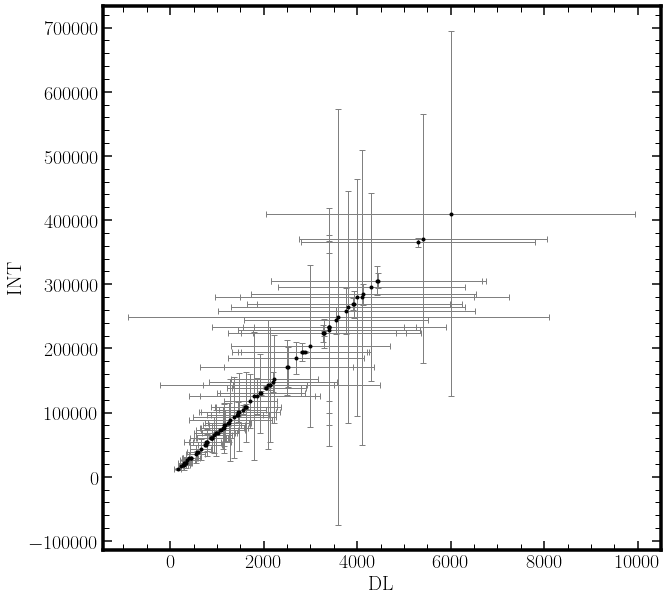

In [14]:
plt.figure(figsize = (10,10))
plt.errorbar(x,y,yerr=y_error,xerr=x_error,fmt=".k", ecolor='gray', lw=1,capsize=3)
plt.xlabel('DL')
plt.ylabel('INT')

In [16]:
from scipy import odr
def func(m, x):
  return m*x

# Model object
model = odr.Model(func)

data  = odr.RealData(x, y, sx = x_error, sy = y_error)

# Set up ODR with the model and data.
odr   = odr.ODR(data, model, beta0=[1.])

# Run the regression.
out   = odr.run()

#print fit parameters and 1-sigma estimates
popt  = out.beta
perr  = out.sd_beta
print("Error in slope" + perr)
print("slope"+ popt)

array([0.19452848])

Text(0, 600000, 'Slope: 68.0585+/-0.1945')

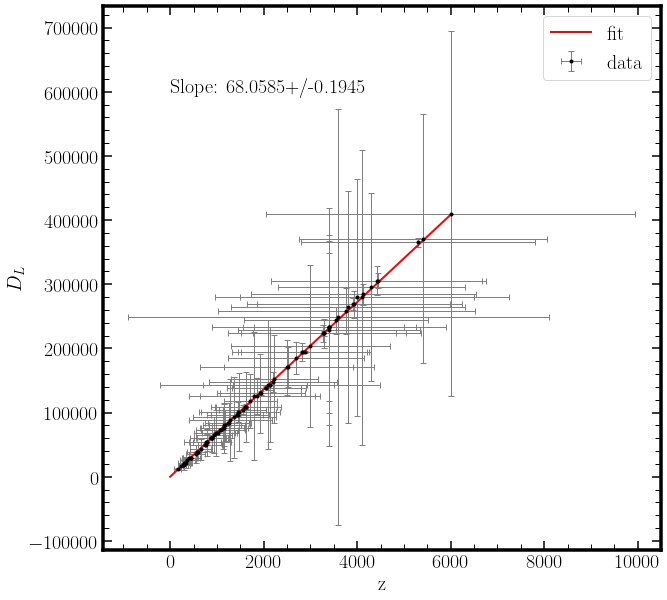

In [21]:
x_m = np.linspace(0,6000,1000000)
y_m = func(popt, x_m)

plt.figure(figsize = (10,10))
plt.errorbar(x,y,yerr=y_error,xerr=x_error,fmt=".k", ecolor='gray', lw=1,capsize=3)
plt.plot(x_m,y_m, color = 'red', linewidth= 2)
plt.xlabel('z')
plt.ylabel(r'$D_L$')
plt.legend(['fit','data'])
plt.text(0,600000,"Slope: "+str(np.round(popt[0],4))+"+/-"+str(np.round(perr[0],4)))
#plt.title(f'm = {np.round(popt[0],4)}, m_err = {np.round(perr[0],4)}')